In [1]:
%load_ext watermark
%watermark -v -p numpy,scipy,matplotlib,tensorflow

CPython 3.6.6
IPython 6.5.0

numpy 1.15.2
scipy 1.1.0
matplotlib 3.0.0
tensorflow 1.11.0


**10장 – 인공 신경망 소개**

_이 노트북은 10장에 있는 모든 샘플 코드와 연습문제 해답을 가지고 있습니다._

# 설정

파이썬 2와 3을 모두 지원합니다. 공통 모듈을 임포트하고 맷플롯립 그림이 노트북 안에 포함되도록 설정하고 생성한 그림을 저장하기 위한 함수를 준비합니다:

In [2]:
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴더
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# 퍼셉트론

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [4]:
y_pred

array([1])

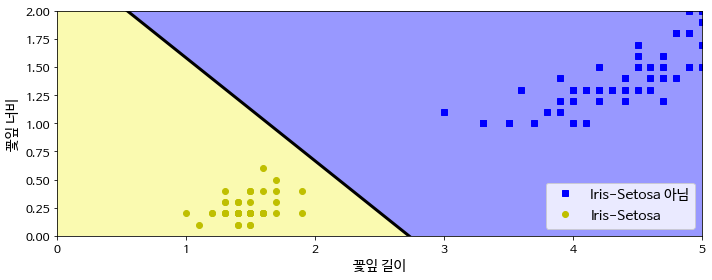

In [5]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Iris-Setosa 아님")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# 활성화 함수

In [6]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

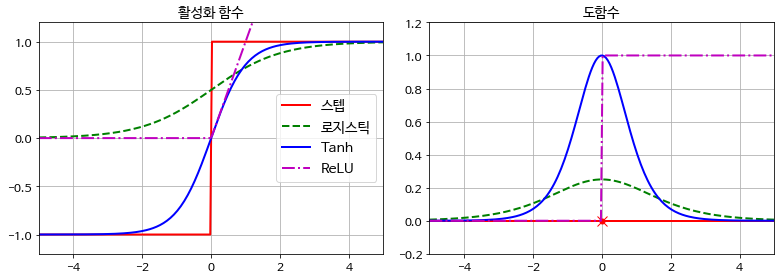

In [7]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="스텝")
plt.plot(z, logit(z), "g--", linewidth=2, label="로지스틱")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("활성화 함수", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("도함수", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [8]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

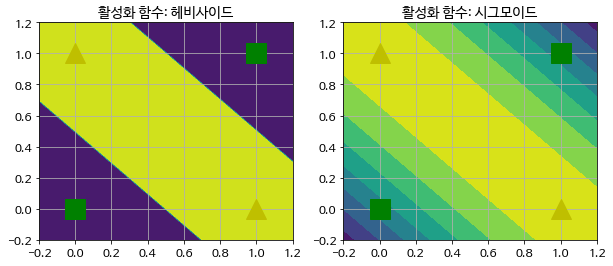

In [9]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("활성화 함수: 헤비사이드", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("활성화 함수: 시그모이드", fontsize=14)
plt.grid(True)

# MNIST를 위한 FNN

In [10]:
import tensorflow as tf

주의: `tf.examples.tutorials.mnist`은 삭제될 예정이므로 대신 `tf.keras.datasets.mnist`를 사용하겠습니다. `tf.contrib.learn` API는 `tf.estimator`와 `tf.feature_column`로 옮겨졌고 상당히 많이 바뀌었습니다. 특히 `infer_real_valued_columns_from_input()` 함수와 `SKCompat` 클래스가 없습니다.

In [11]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

## Estimator API를 사용

In [12]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpswil2b17', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fdf5139acc0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, u

INFO:tensorflow:global_step/sec: 699.63
INFO:tensorflow:loss = 2.600134, step = 6000 (0.144 sec)
INFO:tensorflow:global_step/sec: 747.924
INFO:tensorflow:loss = 0.18643329, step = 6100 (0.133 sec)
INFO:tensorflow:global_step/sec: 720.662
INFO:tensorflow:loss = 0.8888016, step = 6200 (0.139 sec)
INFO:tensorflow:global_step/sec: 726.789
INFO:tensorflow:loss = 0.6006567, step = 6300 (0.139 sec)
INFO:tensorflow:global_step/sec: 727.343
INFO:tensorflow:loss = 0.72476697, step = 6400 (0.137 sec)
INFO:tensorflow:global_step/sec: 754.369
INFO:tensorflow:loss = 0.33643788, step = 6500 (0.133 sec)
INFO:tensorflow:global_step/sec: 694.858
INFO:tensorflow:loss = 0.38787085, step = 6600 (0.143 sec)
INFO:tensorflow:global_step/sec: 689.687
INFO:tensorflow:loss = 2.379571, step = 6700 (0.145 sec)
INFO:tensorflow:global_step/sec: 761.871
INFO:tensorflow:loss = 0.5547561, step = 6800 (0.131 sec)
INFO:tensorflow:global_step/sec: 758.65
INFO:tensorflow:loss = 0.36278042, step = 6900 (0.133 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 713.835
INFO:tensorflow:loss = 0.09706494, step = 14200 (0.141 sec)
INFO:tensorflow:global_step/sec: 749.562
INFO:tensorflow:loss = 0.42920858, step = 14300 (0.133 sec)
INFO:tensorflow:global_step/sec: 707.887
INFO:tensorflow:loss = 0.14015074, step = 14400 (0.141 sec)
INFO:tensorflow:global_step/sec: 696.248
INFO:tensorflow:loss = 0.15915424, step = 14500 (0.145 sec)
INFO:tensorflow:global_step/sec: 637.048
INFO:tensorflow:loss = 0.018949341, step = 14600 (0.157 sec)
INFO:tensorflow:global_step/sec: 729.726
INFO:tensorflow:loss = 0.36566472, step = 14700 (0.136 sec)
INFO:tensorflow:global_step/sec: 726.298
INFO:tensorflow:loss = 0.18573679, step = 14800 (0.138 sec)
INFO:tensorflow:global_step/sec: 730.933
INFO:tensorflow:loss = 0.014530957, step = 14900 (0.137 sec)
INFO:tensorflow:global_step/sec: 720.959
INFO:tensorflow:loss = 0.07139751, step = 15000 (0.139 sec)
INFO:tensorflow:global_step/sec: 726.054
INFO:tensorflow:loss = 0.107568994, step = 15100

INFO:tensorflow:global_step/sec: 645.697
INFO:tensorflow:loss = 0.025995336, step = 22300 (0.156 sec)
INFO:tensorflow:global_step/sec: 614.382
INFO:tensorflow:loss = 0.12232572, step = 22400 (0.162 sec)
INFO:tensorflow:global_step/sec: 805.356
INFO:tensorflow:loss = 0.028854646, step = 22500 (0.125 sec)
INFO:tensorflow:global_step/sec: 762.884
INFO:tensorflow:loss = 0.030926347, step = 22600 (0.135 sec)
INFO:tensorflow:global_step/sec: 724.041
INFO:tensorflow:loss = 0.2178863, step = 22700 (0.133 sec)
INFO:tensorflow:global_step/sec: 766.548
INFO:tensorflow:loss = 0.023459079, step = 22800 (0.130 sec)
INFO:tensorflow:global_step/sec: 744.594
INFO:tensorflow:loss = 0.053927407, step = 22900 (0.134 sec)
INFO:tensorflow:global_step/sec: 710.941
INFO:tensorflow:loss = 0.043680433, step = 23000 (0.141 sec)
INFO:tensorflow:global_step/sec: 717.754
INFO:tensorflow:loss = 0.007980049, step = 23100 (0.139 sec)
INFO:tensorflow:global_step/sec: 723.971
INFO:tensorflow:loss = 0.10982484, step = 23

INFO:tensorflow:global_step/sec: 760.07
INFO:tensorflow:loss = 0.0071531367, step = 30400 (0.132 sec)
INFO:tensorflow:global_step/sec: 760.687
INFO:tensorflow:loss = 0.024101298, step = 30500 (0.131 sec)
INFO:tensorflow:global_step/sec: 709.863
INFO:tensorflow:loss = 0.04395157, step = 30600 (0.147 sec)
INFO:tensorflow:global_step/sec: 690.374
INFO:tensorflow:loss = 0.016406301, step = 30700 (0.139 sec)
INFO:tensorflow:global_step/sec: 653.662
INFO:tensorflow:loss = 0.032974076, step = 30800 (0.152 sec)
INFO:tensorflow:global_step/sec: 671.653
INFO:tensorflow:loss = 0.0096302945, step = 30900 (0.149 sec)
INFO:tensorflow:global_step/sec: 754.028
INFO:tensorflow:loss = 0.019674212, step = 31000 (0.133 sec)
INFO:tensorflow:global_step/sec: 671.085
INFO:tensorflow:loss = 0.0075751077, step = 31100 (0.150 sec)
INFO:tensorflow:global_step/sec: 714.796
INFO:tensorflow:loss = 0.029245356, step = 31200 (0.139 sec)
INFO:tensorflow:global_step/sec: 681.277
INFO:tensorflow:loss = 0.074795894, step

INFO:tensorflow:loss = 0.028822834, step = 38400 (0.146 sec)
INFO:tensorflow:global_step/sec: 681.642
INFO:tensorflow:loss = 0.0136615, step = 38500 (0.147 sec)
INFO:tensorflow:global_step/sec: 778.642
INFO:tensorflow:loss = 0.046272814, step = 38600 (0.129 sec)
INFO:tensorflow:global_step/sec: 696.129
INFO:tensorflow:loss = 0.078789145, step = 38700 (0.150 sec)
INFO:tensorflow:global_step/sec: 712.848
INFO:tensorflow:loss = 0.00979785, step = 38800 (0.134 sec)
INFO:tensorflow:global_step/sec: 723.704
INFO:tensorflow:loss = 0.031138618, step = 38900 (0.138 sec)
INFO:tensorflow:global_step/sec: 697.152
INFO:tensorflow:loss = 0.011168446, step = 39000 (0.145 sec)
INFO:tensorflow:global_step/sec: 731.665
INFO:tensorflow:loss = 0.014355861, step = 39100 (0.137 sec)
INFO:tensorflow:global_step/sec: 694.536
INFO:tensorflow:loss = 0.0041563846, step = 39200 (0.143 sec)
INFO:tensorflow:global_step/sec: 724.232
INFO:tensorflow:loss = 0.011017907, step = 39300 (0.139 sec)
INFO:tensorflow:global_

In [13]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-01-05:13:48
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpswil2b17/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-01-05:13:48
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9804, average_loss = 0.10485105, global_step = 44000, loss = 13.2722845
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: /tmp/tmpswil2b17/model.ckpt-44000


In [14]:
eval_results

{'accuracy': 0.9804,
 'average_loss': 0.10485105,
 'loss': 13.2722845,
 'global_step': 44000}

In [15]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpswil2b17/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([ -9.321728 ,  -1.3422173,   3.5012596,   7.094034 ,  -5.55881  ,
         -6.051426 , -15.162504 ,  24.179514 ,   1.8007286,   6.504323 ],
       dtype=float32),
 'probabilities': array([2.8222452e-15, 8.2423929e-12, 1.0460390e-09, 3.8007595e-08,
        1.2156549e-13, 7.4279612e-14, 8.2031113e-18, 1.0000000e+00,
        1.9099267e-10, 2.1074753e-08], dtype=float32),
 'class_ids': array([7]),
 'classes': array([b'7'], dtype=object)}

## `tf.contrib.learn`을 사용

In [16]:
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets("/tmp/data/")

In [17]:
# X_train = mnist.train.images
# X_test = mnist.test.images
# y_train = mnist.train.labels.astype("int")
# y_test = mnist.test.labels.astype("int")

In [18]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42) # 책에는 없음

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
tf.logging.set_verbosity(tf.logging.INFO)
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)

Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fdf50084470>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_mas

INFO:tensorflow:global_step/sec: 856.358
INFO:tensorflow:loss = 0.17416818, step = 2900 (0.117 sec)
INFO:tensorflow:global_step/sec: 883.763
INFO:tensorflow:loss = 0.016145142, step = 3000 (0.113 sec)
INFO:tensorflow:global_step/sec: 824.132
INFO:tensorflow:loss = 0.046176873, step = 3100 (0.121 sec)
INFO:tensorflow:global_step/sec: 865.354
INFO:tensorflow:loss = 0.009885431, step = 3200 (0.116 sec)
INFO:tensorflow:global_step/sec: 748.191
INFO:tensorflow:loss = 0.03948251, step = 3300 (0.134 sec)
INFO:tensorflow:global_step/sec: 880.76
INFO:tensorflow:loss = 0.25074342, step = 3400 (0.113 sec)
INFO:tensorflow:global_step/sec: 886.82
INFO:tensorflow:loss = 0.108091906, step = 3500 (0.114 sec)
INFO:tensorflow:global_step/sec: 826.475
INFO:tensorflow:loss = 0.19296156, step = 3600 (0.120 sec)
INFO:tensorflow:global_step/sec: 834.812
INFO:tensorflow:loss = 0.03244283, step = 3700 (0.120 sec)
INFO:tensorflow:global_step/sec: 830.087
INFO:tensorflow:loss = 0.009450477, step = 3800 (0.121 se

INFO:tensorflow:loss = 0.021191241, step = 11000 (0.120 sec)
INFO:tensorflow:global_step/sec: 877.565
INFO:tensorflow:loss = 0.0032526294, step = 11100 (0.114 sec)
INFO:tensorflow:global_step/sec: 868.372
INFO:tensorflow:loss = 0.0009863066, step = 11200 (0.115 sec)
INFO:tensorflow:global_step/sec: 883.737
INFO:tensorflow:loss = 0.005570197, step = 11300 (0.113 sec)
INFO:tensorflow:global_step/sec: 879.942
INFO:tensorflow:loss = 0.0052527096, step = 11400 (0.114 sec)
INFO:tensorflow:global_step/sec: 828.195
INFO:tensorflow:loss = 0.013794398, step = 11500 (0.121 sec)
INFO:tensorflow:global_step/sec: 889.172
INFO:tensorflow:loss = 0.0014422104, step = 11600 (0.113 sec)
INFO:tensorflow:global_step/sec: 854.58
INFO:tensorflow:loss = 0.0031744605, step = 11700 (0.116 sec)
INFO:tensorflow:global_step/sec: 733.197
INFO:tensorflow:loss = 0.00062018866, step = 11800 (0.136 sec)
INFO:tensorflow:global_step/sec: 964.847
INFO:tensorflow:loss = 0.0047453996, step = 11900 (0.104 sec)
INFO:tensorflo

INFO:tensorflow:loss = 0.0014835794, step = 19000 (0.122 sec)
INFO:tensorflow:global_step/sec: 839.175
INFO:tensorflow:loss = 0.0006060199, step = 19100 (0.119 sec)
INFO:tensorflow:global_step/sec: 884.003
INFO:tensorflow:loss = 0.0010442394, step = 19200 (0.112 sec)
INFO:tensorflow:global_step/sec: 879.012
INFO:tensorflow:loss = 0.0055901613, step = 19300 (0.115 sec)
INFO:tensorflow:global_step/sec: 861.077
INFO:tensorflow:loss = 0.0017690896, step = 19400 (0.115 sec)
INFO:tensorflow:global_step/sec: 895.348
INFO:tensorflow:loss = 0.0020616534, step = 19500 (0.112 sec)
INFO:tensorflow:global_step/sec: 796.594
INFO:tensorflow:loss = 0.0006937563, step = 19600 (0.125 sec)
INFO:tensorflow:global_step/sec: 813.248
INFO:tensorflow:loss = 0.00011782359, step = 19700 (0.123 sec)
INFO:tensorflow:global_step/sec: 872.407
INFO:tensorflow:loss = 0.00049041805, step = 19800 (0.115 sec)
INFO:tensorflow:global_step/sec: 920.878
INFO:tensorflow:loss = 0.0022736136, step = 19900 (0.108 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 842.954
INFO:tensorflow:loss = 0.00079672324, step = 27000 (0.119 sec)
INFO:tensorflow:global_step/sec: 875.579
INFO:tensorflow:loss = 0.0005314601, step = 27100 (0.114 sec)
INFO:tensorflow:global_step/sec: 832.648
INFO:tensorflow:loss = 0.0004714693, step = 27200 (0.121 sec)
INFO:tensorflow:global_step/sec: 860.677
INFO:tensorflow:loss = 0.0010888837, step = 27300 (0.115 sec)
INFO:tensorflow:global_step/sec: 953.83
INFO:tensorflow:loss = 0.00048721992, step = 27400 (0.105 sec)
INFO:tensorflow:global_step/sec: 880.962
INFO:tensorflow:loss = 0.0009896309, step = 27500 (0.113 sec)
INFO:tensorflow:global_step/sec: 854.157
INFO:tensorflow:loss = 0.0012079075, step = 27600 (0.117 sec)
INFO:tensorflow:global_step/sec: 969.55
INFO:tensorflow:loss = 0.00019603423, step = 27700 (0.104 sec)
INFO:tensorflow:global_step/sec: 871.815
INFO:tensorflow:loss = 0.00021912105, step = 27800 (0.115 sec)
INFO:tensorflow:global_step/sec: 912.279
INFO:tensorflow:loss = 0.00056

INFO:tensorflow:global_step/sec: 832.363
INFO:tensorflow:loss = 0.00027991846, step = 35000 (0.120 sec)
INFO:tensorflow:global_step/sec: 908.507
INFO:tensorflow:loss = 0.00070569443, step = 35100 (0.111 sec)
INFO:tensorflow:global_step/sec: 830.266
INFO:tensorflow:loss = 0.00021216612, step = 35200 (0.120 sec)
INFO:tensorflow:global_step/sec: 912.488
INFO:tensorflow:loss = 0.000107948035, step = 35300 (0.110 sec)
INFO:tensorflow:global_step/sec: 910.821
INFO:tensorflow:loss = 0.0012511578, step = 35400 (0.110 sec)
INFO:tensorflow:global_step/sec: 850.691
INFO:tensorflow:loss = 0.00032151668, step = 35500 (0.119 sec)
INFO:tensorflow:global_step/sec: 828.464
INFO:tensorflow:loss = 0.00035051012, step = 35600 (0.120 sec)
INFO:tensorflow:global_step/sec: 898.896
INFO:tensorflow:loss = 0.0008733935, step = 35700 (0.111 sec)
INFO:tensorflow:global_step/sec: 897.185
INFO:tensorflow:loss = 0.0006166334, step = 35800 (0.113 sec)
INFO:tensorflow:global_step/sec: 856.737
INFO:tensorflow:loss = 0.

SKCompat()

In [19]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpjaqkzp9w/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.9834

In [20]:
from sklearn.metrics import log_loss

y_pred_proba = y_pred['probabilities']
log_loss(y_test, y_pred_proba)

0.07106067949302455

## 저수준의 TensorFlow API 사용

In [21]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [22]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [23]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [24]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [25]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [26]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [27]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [28]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [29]:
n_epochs = 40
batch_size = 50

In [30]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [31]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "배치 데이터 정확도:", acc_batch, "검증 세트 정확도:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 배치 데이터 정확도: 0.9 검증 세트 정확도: 0.9146
1 배치 데이터 정확도: 0.92 검증 세트 정확도: 0.936
2 배치 데이터 정확도: 0.96 검증 세트 정확도: 0.945
3 배치 데이터 정확도: 0.92 검증 세트 정확도: 0.9512
4 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9558
5 배치 데이터 정확도: 0.96 검증 세트 정확도: 0.9566
6 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9612
7 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.963
8 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9652
9 배치 데이터 정확도: 0.96 검증 세트 정확도: 0.966
10 배치 데이터 정확도: 0.92 검증 세트 정확도: 0.9688
11 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.969
12 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.967
13 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9706
14 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9714
15 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9732
16 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9736
17 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9742
18 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9746
19 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9748
20 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9752
21 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9752
22 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9764
23 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9752
24 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9772
25 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.977
26 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9778


In [32]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # 또는 save_path를 사용합니다
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [33]:
print("예측 클래스:", y_pred)
print("진짜 클래스:", y_test[:20])

예측 클래스: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
진짜 클래스: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [34]:
from tensorflow_graph_in_jupyter import show_graph

In [35]:
show_graph(tf.get_default_graph())

## `neuron_layer()` 대신 `dense()` 사용

In [36]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [37]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

In [38]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

In [39]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [40]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [41]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [42]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [43]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "배치 데이터 정확도:", acc_batch, "검증 세트 정확도:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 배치 데이터 정확도: 0.9 검증 세트 정확도: 0.9024
1 배치 데이터 정확도: 0.92 검증 세트 정확도: 0.9254
2 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9372
3 배치 데이터 정확도: 0.9 검증 세트 정확도: 0.9416
4 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9472
5 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9512
6 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9548
7 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9612
8 배치 데이터 정확도: 0.96 검증 세트 정확도: 0.9622
9 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9648
10 배치 데이터 정확도: 0.92 검증 세트 정확도: 0.9652
11 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9668
12 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9686
13 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9704
14 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9696
15 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9718
16 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9728
17 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9732
18 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9748
19 배치 데이터 정확도: 0.96 검증 세트 정확도: 0.9756


In [44]:
show_graph(tf.get_default_graph())

# 연습문제 정답

## 1. to 8.

부록 A 참조.

## 9.

_깊은 다층 퍼셉트론을 MNIST 데이터셋에 훈련시키고 98% 정확도를 얻을 수 있는지 확인해보세요. 9장의 마지막 연습문제에서와 같이 모든 부가 기능을 추가해보세요(즉, 체크포인트를 저장하고, 중지되었을 때 마지막 체크포인트를 복원하고, 서머리를 추가하고, 텐서보드를 사용해 학습 곡선을 그려보세요)._

먼저 심층 신경망을 만듭니다. 한가지 추가된 것 외에는 앞서 했던 것과 동일합니다. 텐서보드에서 학습 곡선을 볼 수 있도록 훈련하는 동안 손실과 정확도를 기록하는 `tf.summary.scalar()` 추가합니다.

In [45]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [46]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

In [47]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [48]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    loss_summary = tf.summary.scalar('log_loss', loss)

In [49]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [50]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

In [51]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

텐서보드 로그를 기록할 디렉토리를 정의합니다:

In [52]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [53]:
logdir = log_dir("mnist_dnn")

텐서보드 로그를 작성하는 데 필요한 `FileWriter` 객체를 만듭니다:

In [54]:
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

잠시만요! 조기 종료를 구현하는 것이 좋겠죠? 이렇게 하려면 검증 세트가 필요합니다.

In [55]:
# X_valid = mnist.validation.images
# y_valid = mnist.validation.labels

In [56]:
m, n = X_train.shape

In [57]:
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_deep_mnist_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_deep_mnist_model"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # 체크포인트 파일이 있으면 모델을 복원하고 에포크 숫자를 로드합니다
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("이전 훈련이 중지되었습니다. 에포크 {}에서 시작합니다".format(start_epoch))
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], feed_dict={X: X_valid, y: y_valid})
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        if epoch % 5 == 0:
            print("에포크:", epoch,
                  "\t검증 세트 정확도: {:.3f}%".format(accuracy_val * 100),
                  "\t손실: {:.5f}".format(loss_val))
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("조기 종료")
                    break

에포크: 0 	검증 세트 정확도: 90.240% 	손실: 0.35380
에포크: 5 	검증 세트 정확도: 95.120% 	손실: 0.17919
에포크: 10 	검증 세트 정확도: 96.520% 	손실: 0.12786
에포크: 15 	검증 세트 정확도: 97.220% 	손실: 0.10330
에포크: 20 	검증 세트 정확도: 97.480% 	손실: 0.09162
에포크: 25 	검증 세트 정확도: 97.620% 	손실: 0.08216
에포크: 30 	검증 세트 정확도: 97.740% 	손실: 0.07883
에포크: 35 	검증 세트 정확도: 97.780% 	손실: 0.07428
에포크: 40 	검증 세트 정확도: 97.840% 	손실: 0.07166
에포크: 45 	검증 세트 정확도: 98.100% 	손실: 0.06747
에포크: 50 	검증 세트 정확도: 98.040% 	손실: 0.06747
에포크: 55 	검증 세트 정확도: 98.020% 	손실: 0.06692
에포크: 60 	검증 세트 정확도: 98.040% 	손실: 0.06740
에포크: 65 	검증 세트 정확도: 98.180% 	손실: 0.06682
에포크: 70 	검증 세트 정확도: 98.180% 	손실: 0.06616
에포크: 75 	검증 세트 정확도: 98.100% 	손실: 0.06660
에포크: 80 	검증 세트 정확도: 98.140% 	손실: 0.06681
에포크: 85 	검증 세트 정확도: 98.200% 	손실: 0.06624
에포크: 90 	검증 세트 정확도: 98.160% 	손실: 0.06761
에포크: 95 	검증 세트 정확도: 98.180% 	손실: 0.06911
에포크: 100 	검증 세트 정확도: 98.220% 	손실: 0.06896
에포크: 105 	검증 세트 정확도: 98.220% 	손실: 0.07090
에포크: 110 	검증 세트 정확도: 98.180% 	손실: 0.07078
에포크: 115 	검증 세트 정확도: 98.280% 	손실: 0.07085
조기 종료


In [58]:
os.remove(checkpoint_epoch_path)

In [59]:
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    accuracy_val = accuracy.eval(feed_dict={X: X_test, y: y_test})

INFO:tensorflow:Restoring parameters from ./my_deep_mnist_model


In [60]:
accuracy_val

0.9791